In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
def generate_poly_data():
	sample = np.random.uniform(low=0, high=100, size=(50,))
	noice = np.random.normal(size=(50,))
	
	X = np.linspace(-3, 3, num=50).reshape((50, 1))
	y = 3 * sample ** 2 + 2 * sample + 1 + noice
	return (X, y)

def gradient_descent(
	X: np.ndarray[float],
	y: np.ndarray[float],
	n_iterations: int = 1000,
	nu: float = 1e-2
):
	X_mean = X.mean(axis=0)
	X_std = X.std(axis=0)
	X_norm = (X - X_mean) / X_std

	X_aug = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])
	w = np.zeros(shape=(X_aug.shape[1]))

	for _ in range(n_iterations):
		grad = (2 / X_aug.shape[0]) * X_aug.T @ (X_aug @ w - y)
		w -= nu * grad
	
	return w


In [3]:
np.random.seed(1)

(X, y) = generate_poly_data()

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
w = gradient_descent(X_poly, y, n_iterations=5000)

In [8]:
X_poly_test = poly.transform(X)
X_poly_test_norm = (X_poly_test - X_poly.mean()) / X_poly.std()
X_test_aug = np.hstack([np.ones((X_poly_test_norm.shape[0], 1)), X_poly_test_norm])

y_pred_manual = X_test_aug @ w
y_pred_sklearn = model.predict(X_poly)

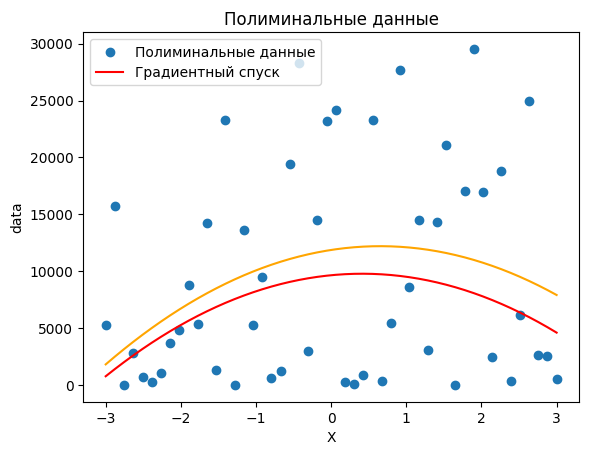

In [9]:
plt.figure()
plt.scatter(X, y, label='Полиминальные данные')
plt.plot(X, y_pred_manual, label='Градиентный спуск', color='red')
plt.plot(X, y_pred_sklearn, color='orange')
plt.title('Полиминальные данные')
plt.legend()
plt.xlabel('X')
plt.ylabel('data')
plt.show()